In [19]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
column_names=["Label","Message"]
data = pd.read_csv("SMSSpamCollection", sep=r'\t',names=column_names)
data.head()

C:\Users\saika\AppData\Local\Temp\ipykernel_12024\1666609791.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("SMSSpamCollection", sep=r'\t',names=column_names)


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
unique_labels = data['Label'].unique()
print(unique_labels)


['ham' 'spam']


Changing the spam as 0 and not spam as 1.

In [4]:
#Creating a mapping .
mapping={"ham":0,"spam":1}

data["Label"]=data["Label"].map(mapping)
category_count=data["Label"].value_counts()
print(data.head())
print("Category wise count :",category_count)


   Label                                            Message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
Category wise count : Label
0    4827
1     747
Name: count, dtype: int64


***Clearly the data is imbalanced.***

In [14]:
#Creating a function to preprocess the text.
def preprocess_text(text:str):
    '''
        This function takes the text as input then tokenizes the text .
        Then for each word makes it into lowercase.
        Then remove an stop words present in the list of tokens.
        Atlast return into a string/text format.
    '''
    stop_words=set(stopwords.words("english"))
    tokens=word_tokenize(text)

    #Removing any punctuation/numeric character based words.Here I'm using isalpha() str method for checking whether all the chars are alphabets or not.
    tokens=[word for word in tokens if word.isalpha()]
    #Converting into lowercase.
    tokens=[word.lower() for word in tokens]
    #Removing the stoptwords.
    tokens=[word for word in tokens if word not in stop_words]

    #The ' ' means that words int he text has spaces between them.
    return ' '.join(tokens)   #Here using join to concatenate  the tokens to get a preprocessed sentence/text.Note:str(tokens) will not work here.
    

In [15]:
#Testing the function.
preprocess_text("Hello! I'm Saikat. Who are you anyway")

'hello saikat anyway'

In [16]:
#Applying the preprocessing on the Message column of the dataset using the apply method.
data['processed_message']=data["Message"].apply(preprocess_text)
data.head()

,Label,Message,processed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


Now let's create a word cloud.

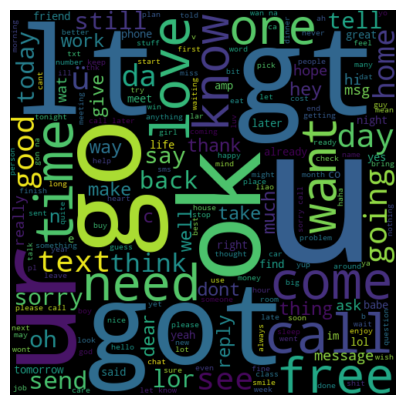

In [20]:
#Merging all the text into a single text corpus.
text=' '.join(data['processed_message'])
wordcloud=WordCloud(height=500,width=500,background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


***Here we are creating feature vector using unigram model.***

In [56]:
#Bag of Words Vector conversion.
bow_vectorizer=CountVectorizer()
X_bow=bow_vectorizer.fit_transform(data["processed_message"])

#TF-IDF
tf_vectorizer=TfidfVectorizer()
X_tf=tf_vectorizer.fit_transform(data["processed_message"])

Y=data["Label"]

print(f"Bag of words vector shape:{X_bow.shape}\n TF-IDF vector shape:{X_tf.shape}")

Bag of words vector shape:(5574, 7197)
 TF-IDF vector shape:(5574, 7197)


In [58]:
#Train test split for vectors created using bag of words
X_bow_train,X_bow_test,Y_train,Y_test=train_test_split(X_bow,Y,test_size=0.25,random_state=42)
#Train test split for vector/features created using TF_IDF
X_tf_train,X_tf_test,Y_train,Y_test=train_test_split(X_tf,Y,test_size=0.25,random_state=42)

Classifying the text using Logistic Regression.

In [59]:
#Fitting on extracted feature using bag of words.
#Note:Here since class imbalance exists so we set class weight to balanced,so that the algo can give more importance to minority class automatically.For more info check scikit-learn docs.
clf_bow_log=LogisticRegression(class_weight="balanced") 
clf_bow_log.fit(X_bow_train,Y_train)
y_pred_bow=clf_bow_log.predict(X_bow_test)
print("Bag of Words Accuracy:",accuracy_score(Y_test,y_pred_bow))
print(classification_report(Y_test,y_pred_bow))

#Fitting on TF-IDF extracted feature.
clf_tf_log=LogisticRegression(class_weight="balanced")
clf_tf_log.fit(X_tf_train,Y_train)
y_pred_tf=clf_tf_log.predict(X_tf_test)
print("TF-IDF accuracy is:",accuracy_score(Y_test,y_pred_tf))
print(classification_report(Y_test,y_pred_tf))

Bag of Words Accuracy: 0.9791965566714491
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1203
           1       0.95      0.90      0.92       191

    accuracy                           0.98      1394
   macro avg       0.96      0.95      0.96      1394
weighted avg       0.98      0.98      0.98      1394

TF-IDF accuracy is: 0.975609756097561
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1203
           1       0.91      0.91      0.91       191

    accuracy                           0.98      1394
   macro avg       0.95      0.95      0.95      1394
weighted avg       0.98      0.98      0.98      1394



***Applying SVM with by default rbf kernel.***

In [61]:
from sklearn.svm import SVC

In [62]:
clf_bow_svm=SVC(class_weight="balanced")
clf_bow_svm.fit(X_bow_train,Y_train)
y_pred_bow=clf_bow_svm.predict(X_bow_test)
print("Bag of Words Accuracy:",accuracy_score(Y_test,y_pred_bow))
print(classification_report(Y_test,y_pred_bow))

#Fitting on TF-IDF extracted feature.
clf_tf_svm=SVC(class_weight="balanced")
clf_tf_svm.fit(X_tf_train,Y_train)
y_pred_tf=clf_tf_svm.predict(X_tf_test)
print("TF-IDF accuracy is:",accuracy_score(Y_test,y_pred_tf))
print(classification_report(Y_test,y_pred_tf))

Bag of Words Accuracy: 0.9741750358680057
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1203
           1       0.97      0.84      0.90       191

    accuracy                           0.97      1394
   macro avg       0.97      0.92      0.94      1394
weighted avg       0.97      0.97      0.97      1394

TF-IDF accuracy is: 0.9763271162123386
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1203
           1       0.98      0.85      0.91       191

    accuracy                           0.98      1394
   macro avg       0.98      0.92      0.95      1394
weighted avg       0.98      0.98      0.98      1394



***Though the data is imbalanced but still the f1 score is pretty good so I've not used any data imbalancing techniques here.***